# Data Cleaning and Preprocessing

## Load the Data and import libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Predict_Sales_Revenue/Data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Exploratory Data Analysis (EDA)

## Import Libraries

In [ ]:
import seaborn as sns

In [ ]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


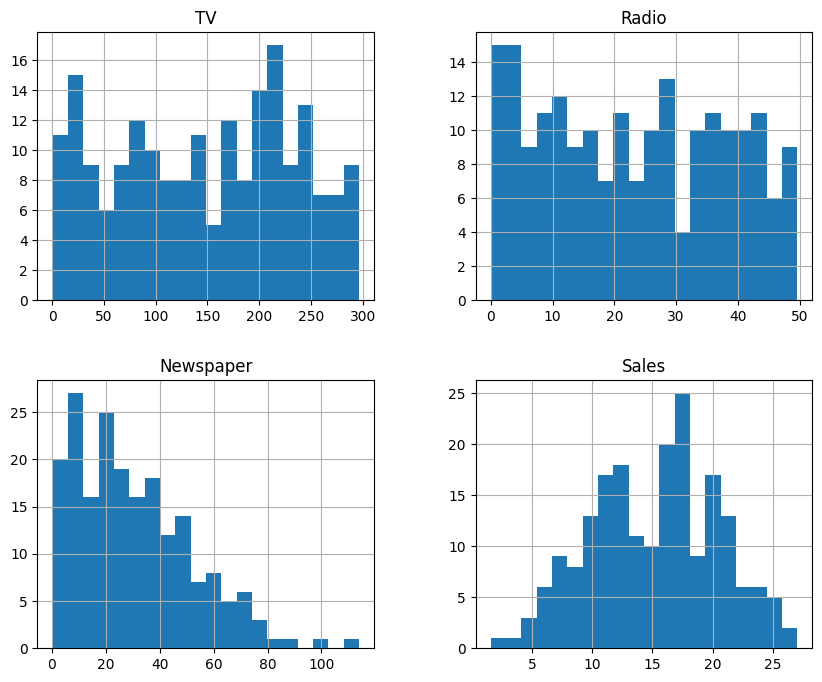

In [ ]:
# Histograms for each numeric variable
data.hist(figsize=(10, 8), bins=20)
plt.show()

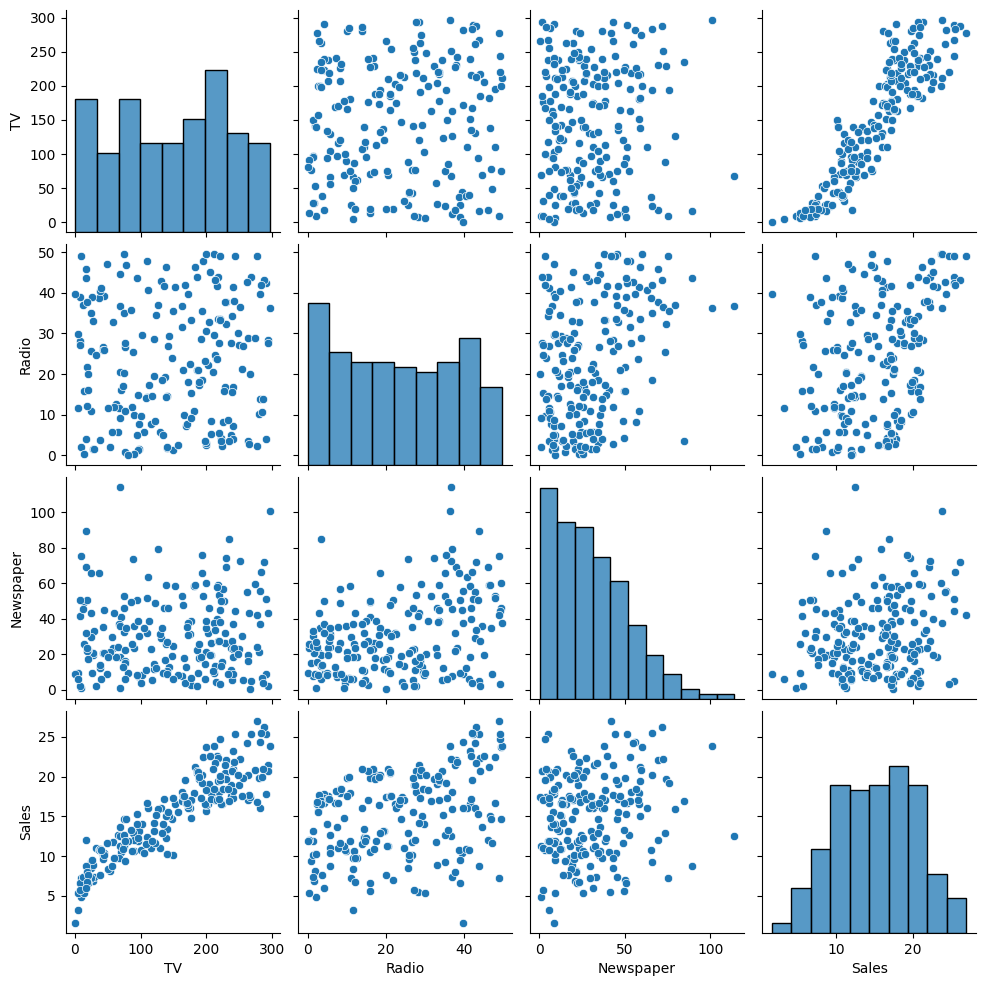

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

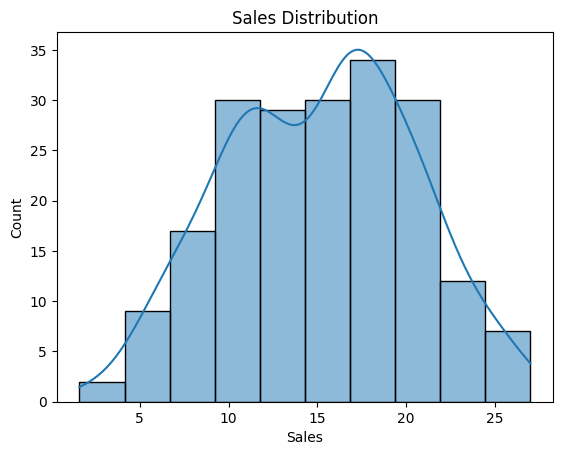

In [41]:
# Sales Distribution
sns.histplot(data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

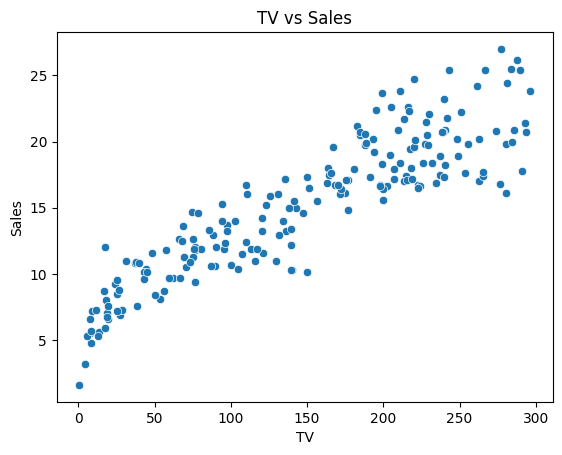

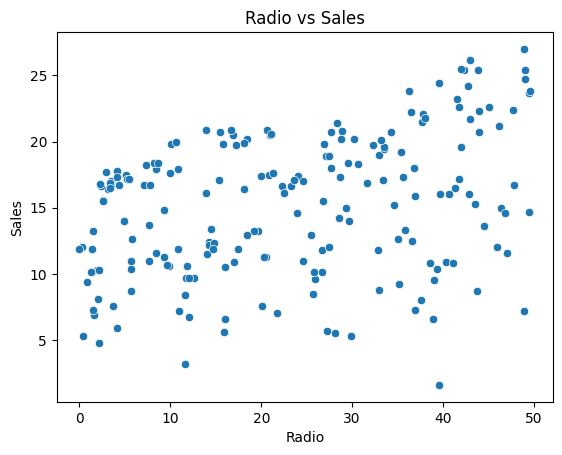

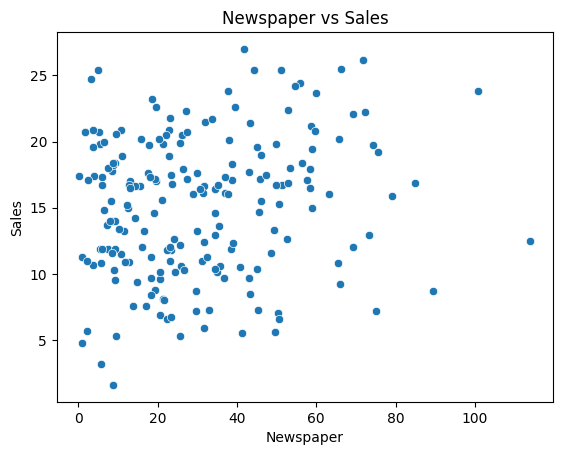

In [42]:
# Scatter plots for TV, Radio, and Newspaper against Sales
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV vs Sales')
plt.show()

sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio vs Sales')
plt.show()

sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper vs Sales')
plt.show()


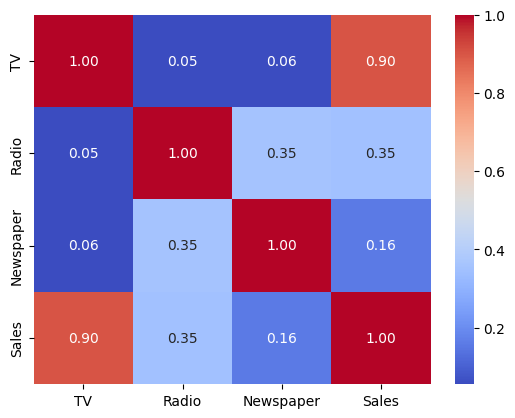

In [43]:
# Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

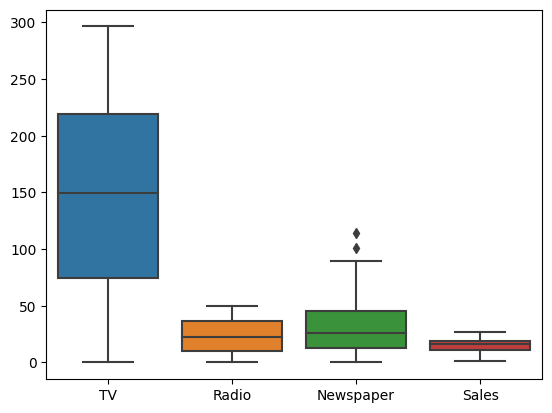

In [44]:
# Boxplots to identify outliers
sns.boxplot(data=data)
plt.show()

Given the notable correlation observed between Sales and the TV variable, we opt to focus on these two factors for constructing our model. The model of choice for this endeavor is Simple Linear Regression.

# Model Selection and Training

## Creating the Simple Linear Regression Model


In [45]:
## Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [46]:
# Assuming data is your DataFrame with 'TV' and 'Sales' columns
X = data[['TV']]  # Independent variable (feature)
y = data['Sales']  # Dependent variable (target)

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Create a linear regression model
model = LinearRegression()

In [49]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))


Mean Absolute Error: 1.9502948931650088
Mean Squared Error: 6.101072906773963
Root Mean Squared Error: 2.470035001123256


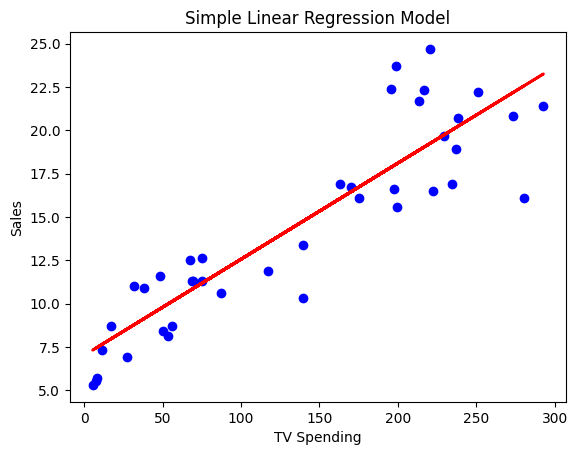

In [52]:
# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regression Model')
plt.xlabel('TV Spending')
plt.ylabel('Sales')
plt.show()